In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve


In [32]:
glass = pd.read_csv("Glass.csv")

In [33]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


[[-2.80806156e-02 -9.33395152e-01  1.55817490e+00 -1.94292468e+00
   1.26415293e-01 -4.89666090e-01  3.19216333e-01 -7.74960291e-02
  -5.72621065e-02]
 [ 4.70627074e-02 -4.00123339e-01  7.72209123e-01  8.97508065e-01
   1.17187619e-02  2.39010567e-01  2.83047636e-01  3.28569294e-01
   3.95083084e-01]
 [ 4.32142821e-03 -7.61228435e-01 -1.05735273e+00  1.21672154e+00
   1.57647307e-01  1.29382578e+00 -1.37847666e-01 -3.15153077e-01
   2.95972077e-02]
 [-3.74581983e-03  9.49049124e-01 -1.33860978e+00  3.52238024e-01
  -6.01506538e-02 -2.82665677e-01 -6.69169505e-01  8.79276912e-01
  -8.86432668e-02]
 [-3.20159735e-02  1.14583489e+00 -9.86004767e-01 -2.45232903e-01
  -1.50064152e-01 -7.89689212e-01 -2.14058690e-01 -5.65437327e-01
  -1.34843478e-01]
 [ 1.24582734e-02 -1.37091219e-04  1.05158326e+00 -2.78310039e-01
  -8.55665556e-02  2.91846348e-02  4.18811892e-01 -2.49759774e-01
  -1.43931441e-01]]
[-0.02593631  0.03544373  0.00630385 -0.00584177 -0.02403771  0.01406822]
0.5230769230769231


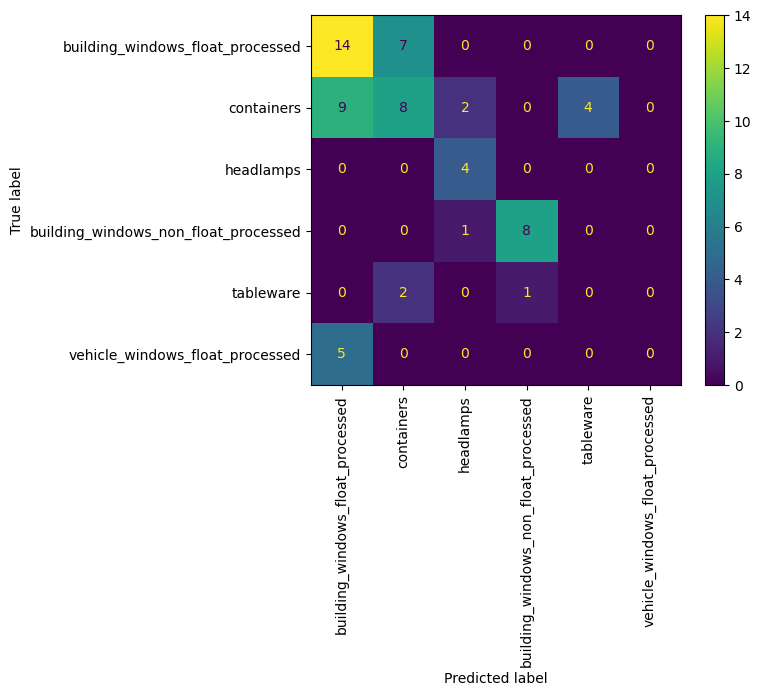

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.50      0.67      0.57        21
building_windows_non_float_processed       0.47      0.35      0.40        23
                          containers       0.57      1.00      0.73         4
                           headlamps       0.89      0.89      0.89         9
                           tableware       0.00      0.00      0.00         3
     vehicle_windows_float_processed       0.00      0.00      0.00         5

                            accuracy                           0.52        65
                           macro avg       0.41      0.48      0.43        65
                        weighted avg       0.49      0.52      0.49        65



In [34]:
glass = pd.read_csv("Glass.csv")
X = glass.drop('Type', axis=1)
y = glass['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=23)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))  

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=y_test.unique())
disp.plot()
plt.xticks(rotation=90)
plt.show()

print(classification_report(y_test,y_pred))

In [35]:
lr=LogisticRegression(solver='saga')
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'penalty':['l1','l2','elasticnet',None],'l1_ratio':np.linspace(0,1,5)}
gcv=GridSearchCV(lr,param_grid=params,cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'l1_ratio': 1.0, 'penalty': None}
0.4902547065337763


In [36]:
bank=pd.read_csv("Bankruptcy.csv",index_col=0)

In [41]:
    x = bank.drop(['D','YR'],axis = 1)
    y = bank['D']

    lr = LogisticRegression()
    kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
    params = {'penalty':['l1','l2','elasticnet',None],'l1_ratio':np.linspace(0,1,5),
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

    gcv = GridSearchCV(lr,param_grid=params,cv=kfold,scoring='roc_auc')
    gcv.fit(x,y)
    print(gcv.best_params_)
    print(gcv.best_score_)

{'l1_ratio': 0.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8684699915469146


In [39]:
hr=pd.read_csv("HR_comma_sep.csv")
dum_hr=pd.get_dummies(hr,drop_first=True)
lr=LogisticRegression(solver='saga')
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'penalty':['l1','l2','elasticnet',None],'l1_ratio':np.linspace(0,1,5),'solver':['lbfgs','liblinear','newton_cg','newton_cholesky','sag','saga'],'multi_class':['ovr','multinomial']}
gcv=GridSearchCV(lr,param_grid=params,cv=kfold,scoring='f1_macro')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'l1_ratio': 0.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
0.687895448979499


In [48]:
img=pd.read_csv("Image_Segmention.csv")

In [49]:
x=img.drop('Class',axis=1)
y=img['Class']
lr = LogisticRegression()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params = {'penalty':['l1','l2','elasticnet',None],'l1_ratio':np.linspace(0,1,5),
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'multi_class':['ovr','multinomial']}

gcv = GridSearchCV(lr,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'l1_ratio': 0.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
-0.5465926857569969
